# Programming with Data : Midterm Project 

## Submission by Wesley Persad  

## My theme is 'Literary Masterpieces' and focuses on the analysis of the song lyrics of the well known Progressive Rock Band called RUSH. 
___


## RUSH are my favourite rock band and they are a Canadian Progressive trio that have been around in their final form since the late 1970s 

## They are now retired but have a rich cannon of albums streching over a career of over 40 years 

## I have chosen this body of work as it contains a rich seam of textual data that can be used for this midterm project 

## I will be exploring the lyrics in their songs since the 1970's, analysing the content to see if the the data tells us anything interesting about the group and their ldeas ? 

## More background to the band can be found at the following [Wikipedia link](https://en.wikipedia.org/wiki/Rush_(band))  

## ![A picture of RUSH's last concert](rush.png "The boys in concert") 

___


# My approach has followed the classic data pipeline: 
1. Identify suitable sources of data and select suitable ones
2. Develop a methodology to extract the required data
3. Extract the required data
4. Process the extracted data i.e. eliminate noise and pre-process into a more suitable form
5. Examine and plot the data to observe anything of interest (iterate to to step 2. a few times)
6. Develop some conclusions from the data
7. Suggest further areas to explore 

# The approach taken for writing code has been : 

1. Test out code to perform the required actions on small samples on test files

2. Convert the code into functions that can be reused more easily 

3. Add the functions to a .py library file 

4. Use the functions on the full sample of data sources 


In [1]:
# This section summarises all the packages I had to import in one place 

from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

# Import the required libaries for analysing this dictionary
import pandas as pd
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')

# Sentiment Analysis imports
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Let us import beautiful soup that will get the HTML from this webpage
from bs4 import BeautifulSoup
import requests

# Import library to create pandas dataframe and make big enough to hold lyrics
import pandas as pd
pd.set_option('max_colwidth', 5000)

# Import time library to delay excessive demand when web scraping
import time

# Import the custome functions written for this midterm project
from midterm import *

# Initialise the stop words with punctuation and weird words 
stop = stopwords.words('english') + list(string.punctuation) + ['chorus',"n't", "'s", "'re", 'n', "'ll", 'ca', "'m"]
#print(stop)


[nltk_data] Downloading package punkt to C:\Users\Wesley
[nltk_data]     Persad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Wesley
[nltk_data]     Persad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# I used the same approach for analysing a RUSH song called Zanadu in a previous peer graded assignment but will extend in this midterm for a more in depth analysis for all their songs :  
___

In [2]:
# Read the text file containing the words into a string
f= open("xanadu.txt", "r")
data = f.read()
f.close()
print(data)

To seek the sacred river Alph
To walk the caves of ice
To break my fast on honey dew
And drink the milk of paradise
I had heard the whispered tales
Of immortality
The deepest mystery
From an ancient book, I took a clue
I scaled the frozen mountain tops
Of eastern lands unknown
Time and man alone
Searching for the lost, Xanadu
Xanadu
To stand within the pleasure dome
Decreed by Kubla Khan
To taste anew the fruits of life
The last immortal man
To find the sacred river Alph
To walk the caves of ice
Oh, I will dine on honey dew
And drink the milk of paradise, oh, paradise
A thousand years have come and gone
But time has passed me by
Stars stopped in the sky
Frozen in an everlasting view
Waiting for the world to end
Weary of the night
Praying for the light
Prison of the lost, Xanadu
Xanadu
Held within the pleasure dome
Decreed by Kubla Khan
To taste my bitter triumph
As a man, immortal man
Never more shall I return
Escape these caves of ice
For I have dined on honey dew
And drunk the milk o

# From the above we can make some observations : 

1. There is the presence of data that is not useful i.e. punctuation and stopwords 
2. The same words at the start of a sentence are capitalzed e.g. "To" and 'to' 
___

In [3]:
# Convert all words to lower case
data = data.lower()
print(data)

to seek the sacred river alph
to walk the caves of ice
to break my fast on honey dew
and drink the milk of paradise
i had heard the whispered tales
of immortality
the deepest mystery
from an ancient book, i took a clue
i scaled the frozen mountain tops
of eastern lands unknown
time and man alone
searching for the lost, xanadu
xanadu
to stand within the pleasure dome
decreed by kubla khan
to taste anew the fruits of life
the last immortal man
to find the sacred river alph
to walk the caves of ice
oh, i will dine on honey dew
and drink the milk of paradise, oh, paradise
a thousand years have come and gone
but time has passed me by
stars stopped in the sky
frozen in an everlasting view
waiting for the world to end
weary of the night
praying for the light
prison of the lost, xanadu
xanadu
held within the pleasure dome
decreed by kubla khan
to taste my bitter triumph
as a man, immortal man
never more shall i return
escape these caves of ice
for i have dined on honey dew
and drunk the milk o

# Create a list of stop words and punctuation not helpful to analysis, so they can be removed from the lyrics: 
___

In [4]:
# Commented out as already done in the first section of code 
#stop = stopwords.words('english') + list(string.punctuation) + ['chorus']
#print(stop)

# The raw lyrics, consisting of one big string needs to be tokenized into a list of words to be more easily processed : 
___

In [5]:
words = word_tokenize(data)
print(words)

['to', 'seek', 'the', 'sacred', 'river', 'alph', 'to', 'walk', 'the', 'caves', 'of', 'ice', 'to', 'break', 'my', 'fast', 'on', 'honey', 'dew', 'and', 'drink', 'the', 'milk', 'of', 'paradise', 'i', 'had', 'heard', 'the', 'whispered', 'tales', 'of', 'immortality', 'the', 'deepest', 'mystery', 'from', 'an', 'ancient', 'book', ',', 'i', 'took', 'a', 'clue', 'i', 'scaled', 'the', 'frozen', 'mountain', 'tops', 'of', 'eastern', 'lands', 'unknown', 'time', 'and', 'man', 'alone', 'searching', 'for', 'the', 'lost', ',', 'xanadu', 'xanadu', 'to', 'stand', 'within', 'the', 'pleasure', 'dome', 'decreed', 'by', 'kubla', 'khan', 'to', 'taste', 'anew', 'the', 'fruits', 'of', 'life', 'the', 'last', 'immortal', 'man', 'to', 'find', 'the', 'sacred', 'river', 'alph', 'to', 'walk', 'the', 'caves', 'of', 'ice', 'oh', ',', 'i', 'will', 'dine', 'on', 'honey', 'dew', 'and', 'drink', 'the', 'milk', 'of', 'paradise', ',', 'oh', ',', 'paradise', 'a', 'thousand', 'years', 'have', 'come', 'and', 'gone', 'but', 'tim

# This list of words can be examined to remove stop words to leave more meaningful words :  
___

In [6]:
words = [w for w in words if not w in stop]
print(words)

['seek', 'sacred', 'river', 'alph', 'walk', 'caves', 'ice', 'break', 'fast', 'honey', 'dew', 'drink', 'milk', 'paradise', 'heard', 'whispered', 'tales', 'immortality', 'deepest', 'mystery', 'ancient', 'book', 'took', 'clue', 'scaled', 'frozen', 'mountain', 'tops', 'eastern', 'lands', 'unknown', 'time', 'man', 'alone', 'searching', 'lost', 'xanadu', 'xanadu', 'stand', 'within', 'pleasure', 'dome', 'decreed', 'kubla', 'khan', 'taste', 'anew', 'fruits', 'life', 'last', 'immortal', 'man', 'find', 'sacred', 'river', 'alph', 'walk', 'caves', 'ice', 'oh', 'dine', 'honey', 'dew', 'drink', 'milk', 'paradise', 'oh', 'paradise', 'thousand', 'years', 'come', 'gone', 'time', 'passed', 'stars', 'stopped', 'sky', 'frozen', 'everlasting', 'view', 'waiting', 'world', 'end', 'weary', 'night', 'praying', 'light', 'prison', 'lost', 'xanadu', 'xanadu', 'held', 'within', 'pleasure', 'dome', 'decreed', 'kubla', 'khan', 'taste', 'bitter', 'triumph', 'man', 'immortal', 'man', 'never', 'shall', 'return', 'escap

# This leaves a more useful list of words on which to perform further  analysis 

# For example, create a dictionary containing the frequency of each word as follows : 
___

In [7]:
# Count the frequency 
counter = {}
for word in words:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
print(counter)

{'seek': 1, 'sacred': 2, 'river': 2, 'alph': 2, 'walk': 2, 'caves': 3, 'ice': 3, 'break': 1, 'fast': 1, 'honey': 3, 'dew': 3, 'drink': 2, 'milk': 3, 'paradise': 5, 'heard': 1, 'whispered': 1, 'tales': 1, 'immortality': 1, 'deepest': 1, 'mystery': 1, 'ancient': 1, 'book': 1, 'took': 1, 'clue': 1, 'scaled': 1, 'frozen': 2, 'mountain': 1, 'tops': 1, 'eastern': 1, 'lands': 1, 'unknown': 1, 'time': 2, 'man': 4, 'alone': 1, 'searching': 1, 'lost': 2, 'xanadu': 4, 'stand': 1, 'within': 2, 'pleasure': 2, 'dome': 2, 'decreed': 2, 'kubla': 2, 'khan': 2, 'taste': 2, 'anew': 1, 'fruits': 1, 'life': 1, 'last': 1, 'immortal': 2, 'find': 1, 'oh': 2, 'dine': 1, 'thousand': 1, 'years': 1, 'come': 1, 'gone': 1, 'passed': 1, 'stars': 1, 'stopped': 1, 'sky': 1, 'everlasting': 1, 'view': 1, 'waiting': 1, 'world': 1, 'end': 1, 'weary': 1, 'night': 1, 'praying': 1, 'light': 1, 'prison': 1, 'held': 1, 'bitter': 1, 'triumph': 1, 'never': 1, 'shall': 1, 'return': 1, 'escape': 1, 'dined': 1, 'drunk': 1, 'whoa': 

# How many different words are used in the song lyrics ? 
___

In [8]:
print(len(counter))

81


# Use the NLTK to analyse the lyrics and plot a wordcloud : 
___

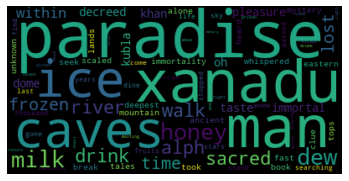

In [9]:
data_analysis = nltk.FreqDist(words)
wcloud = WordCloud().generate_from_frequencies(data_analysis)

# Plot the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-1.5, 200, 100, -2.5)
plt.show()

# These steps have demonstrated the data pipeline to select and display the procedure on one set of lyrics 

# The intention is to have the capability to repeat this process for every song in every album that RUSH has ever released 

# Repeating this procedure is going to be very cumbersome for over 169 songs !!! 

# It would be more efficient to refactor the code into a set of functions that can perform the required steps into a small number of steps or even one step 

# Creation of the functions is done below : 
___


# Define a function to read data from a file : 
___

In [10]:
# Commented out as now in midterm.py
#def read_lyrics(filename):
#    # Read the text file containing the words into a string
#    f= open(filename, "r")
#    lyrics = f.read()
#    f.close()
#    return lyrics
    
print(read_lyrics("xanadu.txt"))

To seek the sacred river Alph
To walk the caves of ice
To break my fast on honey dew
And drink the milk of paradise
I had heard the whispered tales
Of immortality
The deepest mystery
From an ancient book, I took a clue
I scaled the frozen mountain tops
Of eastern lands unknown
Time and man alone
Searching for the lost, Xanadu
Xanadu
To stand within the pleasure dome
Decreed by Kubla Khan
To taste anew the fruits of life
The last immortal man
To find the sacred river Alph
To walk the caves of ice
Oh, I will dine on honey dew
And drink the milk of paradise, oh, paradise
A thousand years have come and gone
But time has passed me by
Stars stopped in the sky
Frozen in an everlasting view
Waiting for the world to end
Weary of the night
Praying for the light
Prison of the lost, Xanadu
Xanadu
Held within the pleasure dome
Decreed by Kubla Khan
To taste my bitter triumph
As a man, immortal man
Never more shall I return
Escape these caves of ice
For I have dined on honey dew
And drunk the milk o

# Better would be reading the lyrics from a file and convert to lower case in one step :  
___

In [11]:
# Commented out as now in midterm.py
#def read_lyrics_lower(filename):
#    # Read the text file containing the words into a string
#    f= open(filename, "r")
#    lyrics = f.read()
#    f.close()
#    lyrics = lyrics.lower()
#    return lyrics

lyrics_data = read_lyrics_lower("xanadu.txt")

print(lyrics_data)

to seek the sacred river alph
to walk the caves of ice
to break my fast on honey dew
and drink the milk of paradise
i had heard the whispered tales
of immortality
the deepest mystery
from an ancient book, i took a clue
i scaled the frozen mountain tops
of eastern lands unknown
time and man alone
searching for the lost, xanadu
xanadu
to stand within the pleasure dome
decreed by kubla khan
to taste anew the fruits of life
the last immortal man
to find the sacred river alph
to walk the caves of ice
oh, i will dine on honey dew
and drink the milk of paradise, oh, paradise
a thousand years have come and gone
but time has passed me by
stars stopped in the sky
frozen in an everlasting view
waiting for the world to end
weary of the night
praying for the light
prison of the lost, xanadu
xanadu
held within the pleasure dome
decreed by kubla khan
to taste my bitter triumph
as a man, immortal man
never more shall i return
escape these caves of ice
for i have dined on honey dew
and drunk the milk o

# Write a function to tokenise the lyrics into a list of words : 
___

In [12]:
# Commented out as now in midterm.py unknown probles with this so left in workbook 
def tokenize(data):
    # Tokenize the data to split it into a list of words
    words = word_tokenize(data)
    return words

lyrics_list = tokenize(lyrics_data)

print(lyrics_list)

['to', 'seek', 'the', 'sacred', 'river', 'alph', 'to', 'walk', 'the', 'caves', 'of', 'ice', 'to', 'break', 'my', 'fast', 'on', 'honey', 'dew', 'and', 'drink', 'the', 'milk', 'of', 'paradise', 'i', 'had', 'heard', 'the', 'whispered', 'tales', 'of', 'immortality', 'the', 'deepest', 'mystery', 'from', 'an', 'ancient', 'book', ',', 'i', 'took', 'a', 'clue', 'i', 'scaled', 'the', 'frozen', 'mountain', 'tops', 'of', 'eastern', 'lands', 'unknown', 'time', 'and', 'man', 'alone', 'searching', 'for', 'the', 'lost', ',', 'xanadu', 'xanadu', 'to', 'stand', 'within', 'the', 'pleasure', 'dome', 'decreed', 'by', 'kubla', 'khan', 'to', 'taste', 'anew', 'the', 'fruits', 'of', 'life', 'the', 'last', 'immortal', 'man', 'to', 'find', 'the', 'sacred', 'river', 'alph', 'to', 'walk', 'the', 'caves', 'of', 'ice', 'oh', ',', 'i', 'will', 'dine', 'on', 'honey', 'dew', 'and', 'drink', 'the', 'milk', 'of', 'paradise', ',', 'oh', ',', 'paradise', 'a', 'thousand', 'years', 'have', 'come', 'and', 'gone', 'but', 'tim

# Write a function to remove stopwords from the list : 
___

In [13]:
# Commented out as now in midterms.py unknown problems ?
def remove_stop(words):
    #This will remove the defined stop words from the words list
    words = [w for w in words if not w in stop]
    return words

lyrics_unstopped = remove_stop(lyrics_list)

print(lyrics_unstopped)

['seek', 'sacred', 'river', 'alph', 'walk', 'caves', 'ice', 'break', 'fast', 'honey', 'dew', 'drink', 'milk', 'paradise', 'heard', 'whispered', 'tales', 'immortality', 'deepest', 'mystery', 'ancient', 'book', 'took', 'clue', 'scaled', 'frozen', 'mountain', 'tops', 'eastern', 'lands', 'unknown', 'time', 'man', 'alone', 'searching', 'lost', 'xanadu', 'xanadu', 'stand', 'within', 'pleasure', 'dome', 'decreed', 'kubla', 'khan', 'taste', 'anew', 'fruits', 'life', 'last', 'immortal', 'man', 'find', 'sacred', 'river', 'alph', 'walk', 'caves', 'ice', 'oh', 'dine', 'honey', 'dew', 'drink', 'milk', 'paradise', 'oh', 'paradise', 'thousand', 'years', 'come', 'gone', 'time', 'passed', 'stars', 'stopped', 'sky', 'frozen', 'everlasting', 'view', 'waiting', 'world', 'end', 'weary', 'night', 'praying', 'light', 'prison', 'lost', 'xanadu', 'xanadu', 'held', 'within', 'pleasure', 'dome', 'decreed', 'kubla', 'khan', 'taste', 'bitter', 'triumph', 'man', 'immortal', 'man', 'never', 'shall', 'return', 'escap

# Write a function to return a dictionary of words with their frequency : 
___

In [14]:
# Commented out as now in midterm.py
#def count_words(words):
#    # Count each word and create a dictionary containing the count
#    counter = {}
#    for word in words:
#        if word in counter:
#            counter[word] += 1
#        else:
#            counter[word] = 1
#    return counter

lyrics_dictionary = count_words(lyrics_unstopped)

print(lyrics_dictionary)

{'seek': 1, 'sacred': 2, 'river': 2, 'alph': 2, 'walk': 2, 'caves': 3, 'ice': 3, 'break': 1, 'fast': 1, 'honey': 3, 'dew': 3, 'drink': 2, 'milk': 3, 'paradise': 5, 'heard': 1, 'whispered': 1, 'tales': 1, 'immortality': 1, 'deepest': 1, 'mystery': 1, 'ancient': 1, 'book': 1, 'took': 1, 'clue': 1, 'scaled': 1, 'frozen': 2, 'mountain': 1, 'tops': 1, 'eastern': 1, 'lands': 1, 'unknown': 1, 'time': 2, 'man': 4, 'alone': 1, 'searching': 1, 'lost': 2, 'xanadu': 4, 'stand': 1, 'within': 2, 'pleasure': 2, 'dome': 2, 'decreed': 2, 'kubla': 2, 'khan': 2, 'taste': 2, 'anew': 1, 'fruits': 1, 'life': 1, 'last': 1, 'immortal': 2, 'find': 1, 'oh': 2, 'dine': 1, 'thousand': 1, 'years': 1, 'come': 1, 'gone': 1, 'passed': 1, 'stars': 1, 'stopped': 1, 'sky': 1, 'everlasting': 1, 'view': 1, 'waiting': 1, 'world': 1, 'end': 1, 'weary': 1, 'night': 1, 'praying': 1, 'light': 1, 'prison': 1, 'held': 1, 'bitter': 1, 'triumph': 1, 'never': 1, 'shall': 1, 'return': 1, 'escape': 1, 'dined': 1, 'drunk': 1, 'whoa': 

# Write a function to make a wordcloud from a list of words : 
___

In [15]:
# Commented out as now in midterm.py unknown problems ?
def make_cloud(words):
    # Find the fequency of the words
    data_analysis = nltk.FreqDist(words)
    wcloud = WordCloud().generate_from_frequencies(data_analysis)
    return wcloud

lyric_cloud = make_cloud(lyrics_dictionary)

# Write a function to plot the word cloud : 
___

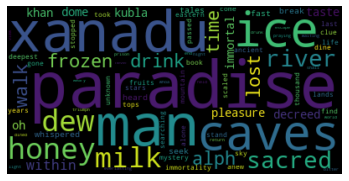

In [16]:
# Commented out as now in midterm.py unknown problems ?
def draw_cloud(wcloud):
    # Plot the wordcloud for the dictionary
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    (-1.5, 200, 100, -2.5)
    plt.show()
    
draw_cloud(lyric_cloud)

# After having written the functions, the data pipeline can now be done in one step : 
___

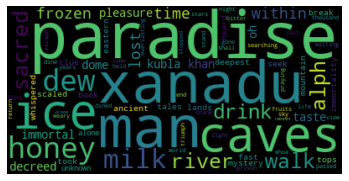

In [17]:
draw_cloud(make_cloud(count_words(remove_stop(tokenize(read_lyrics_lower("xanadu.txt"))))))

# Reviewing what has been done and what needs to be done : 

1. We have created created a data pipeline that can process a text file (or text object) containing song lyrics and go through each step required to eventually draw a wordcloud 
2. Next, we need to create that text file from the lyrics scraped from a website 

# I did a number of Google searches and found various site but the best one for this work seemed to be : [Azlyrics](https://www.azlyrics.com/r/rush.html) 

# This is a good starting point as it contains all the required song information plus links to the lyrics of every song 

# In the following steps, a workflow will be developed to get the lyrics for one song and this will be extended for every song 

# Starting with the website containing the lyrics for Xanadu which can be found at : [Xanadu](https://www.azlyrics.com/lyrics/rush/xanadu.html) 

# This will be achieved by using a function written using the beautiful soup library : 
___

In [18]:
# Commented out as now in midterms.py unknown problems ? 
def get_soup(URL, jar=None):
    request_headers = {"update-insecure-requests":"1",
                       "user-agent":"Chrome",
                       "accept":"text/html",
                       "accept-encoding":"gzip, deflate, br",
                       "accept-language":"en-US,en;q=0.8"        
                        }
    if jar:
        r = requests.get(URL, cookies=jar, headers=request_headers)
    else:
        r = requests.get(URL, headers=request_headers)
        jar = requests.cookies.RequestsCookieJar()
    #print(r.url)
    data = r.text
    soup = BeautifulSoup(data, "html.parser")
    return soup, jar

soup, jar = get_soup('https://www.azlyrics.com/lyrics/rush/xanadu.html')

# NB Commented out this section for brevity
#print(jar)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Rush &quot;Xanadu&quot;: 'To seek the sacred river Alph To walk the caves of ice To break my fast on honeydew And drink th..." name="description"/>
  <meta content="Xanadu lyrics, Rush Xanadu lyrics, Rush lyrics" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>
  <title>
   Rush - Xanadu Lyrics | AZLyrics.com
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="/local/az.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
<script src="https://oss.maxcdn.com/r

# The soup object contains all the HTML to render this page and the next stage will involve finding some way of extracting the lyrics from this page 

# Displaying all the div elements : 
___

In [19]:
# NB Commented out this section for brevity
#def page_data(soup):
#    print(soup.find_all('div'))
#
#page_data(soup)

# We observe that the lyrics are within a div element that has no class 


# Let us find a match for div element that have no class :
___

In [20]:
match = soup.find_all('div', class_ ='')

# NB Commented out this section for brevity
#print(match)

# We observe that this has returned a number of such divs and the lyrics seem to be contained in the second one i.e. index 1 

# Selecting the text of this gives us the required lyrics :
___

In [21]:
print(match[1].text)



'To seek the sacred river Alph
To walk the caves of ice
To break my fast on honeydew
And drink the milk of Paradise...'

I had heard the whispered tales of immortality
The deepest mystery
From an ancient book I took a clue
I scaled the frozen mountain tops of eastern lands unknown
Time and Man alone
Searching for the lost Xanadu

Xanadu...

To stand within the Pleasure Dome
Decreed by Kubla Khan
To taste anew the fruits of life
The last immortal man
To find the sacred river Alph
To walk the caves of ice
Oh, I will dine on honeydew
And drink the milk of Paradise

A thousand years have come and gone but time has passed me by
Stars stopped in the sky
Frozen in an everlasting view
Waiting for the world to end, weary of the night
Praying for the light
Prison of the lost
Xanadu

Xanadu...

Held within the Pleasure Dome
Decreed by Kubla Khan
To taste my bitter triumph
As a mad immortal man
Nevermore shall I return
Escape these caves of ice
For I have dined on honeydew
And drunk the milk of 

# Which can be saved to a string data object :
___

In [22]:
textdata = match[1].text

# NB Commented out this section for brevity
#print(textdata)

# We now have isolated the lyrics from a webpage into a text object 

# Which can use the data processing pipeline to process this to result in a wordcloud as before :
___

In [23]:
# Lets make all lower case first

textdata = textdata.lower()
print(textdata)



'to seek the sacred river alph
to walk the caves of ice
to break my fast on honeydew
and drink the milk of paradise...'

i had heard the whispered tales of immortality
the deepest mystery
from an ancient book i took a clue
i scaled the frozen mountain tops of eastern lands unknown
time and man alone
searching for the lost xanadu

xanadu...

to stand within the pleasure dome
decreed by kubla khan
to taste anew the fruits of life
the last immortal man
to find the sacred river alph
to walk the caves of ice
oh, i will dine on honeydew
and drink the milk of paradise

a thousand years have come and gone but time has passed me by
stars stopped in the sky
frozen in an everlasting view
waiting for the world to end, weary of the night
praying for the light
prison of the lost
xanadu

xanadu...

held within the pleasure dome
decreed by kubla khan
to taste my bitter triumph
as a mad immortal man
nevermore shall i return
escape these caves of ice
for i have dined on honeydew
and drunk the milk of 

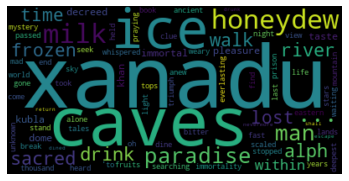

In [24]:
# Now try to draw a wordcloud

draw_cloud(make_cloud(count_words(remove_stop(tokenize(textdata)))))

# Try this on another song e.g. "Here Again" from it's page :
___

In [25]:
soup, jar = get_soup('https://www.azlyrics.com/lyrics/rush/hereagain.html')

# Let us use the data pipeline to get these lyrics and draw the wordcloud :  
___

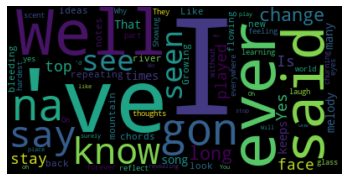

In [26]:
match = soup.find_all('div', class_='')
textdata = match[1].text
# print(textdata)

draw_cloud(make_cloud(count_words(remove_stop(tokenize(textdata)))))

# Rather than starting from a URL for each song, the song data can be obtained from the Azlyrics [homepage](https://www.azlyrics.com/r/rush.html) automatically 

# This will be used in a loop to extract the required data for each song, allowing further analysis to be done 

# The following steps show the procedure for extracting this information from the homepage : 
___

In [27]:
soup, jar = get_soup('https://www.azlyrics.com/r/rush.html')

In [28]:
# NB Commented out this section for brevity
# Now display all the div elements
#
#def page_data(soup):
#    print(soup.find_all('div'))

#page_data(soup)

# We observe that the lyrics are within a div element that has no class so let us find div element that have no class : 
___

In [29]:
match_albums = soup.find('div', class_='album')
print(match_albums)

<div class="album" id="1630">album: <b>"Rush"</b> (1974)</div>


# Write a function to extract information like album name and year : 
___

In [30]:
# Define functions to return album name and year from album div
def albuminfo(album_div):
    name = album_div.b.text
    year = album_div.text.split(' ')[-1]

    # Replace ( and ) from the year string
    year = year.replace('(', '')
    year = year.replace(')', '')

    return name, year

album_name, album_year = albuminfo(match_albums)

#print(album_name, album_year)

# Let us also examine the track information : 
___

In [31]:
match_tracks = soup.find('div', class_='listalbum-item')
print(match_tracks)

<div class="listalbum-item"><a href="../lyrics/rush/findingmyway.html" target="_blank">Finding My Way</a></div>


# Let us also write a function to extract track name and track link information from the homepage : 
___

In [32]:
# Commented out as now in midterm.py unknown problems ?
# Define functions to return track page link and name from album-item div
def trackinfo(track_div):
    link = track_div.a['href']
    # Replace the ellipses with the common root path
    link = link.replace('..', 'https://www.azlyrics.com')
    name = track_div.a.text
    return link, name


track_link, track_name = trackinfo(match_tracks)

#print(track_link, track_name)

# From the above tests we have demonstrated that we can extract the following infromation : 

1. For the album : name & year 
2. For the track : name & link 

# This allows us to do the following :   

1. We can create a Pandas dataframe (DF) containing album and track information 
2. We can then loop through each each track in the DF, get it's page link and scrape the page's lyrics 
___


# The next step is to create a DF to contain the track information we have scraped from the homepage 

# This will allow us to analyse the data more conveniently rather than scraping each time and hammering their servers 

# The DF can then be saved locally to a CSV file to allow it to be reloaded into the DF for further analysis : 
___

In [33]:
# Pandas library already loaded at start but commendted out code left in for info
# Create a pandas dataframe to contain the information for just one track in one album
# With the above column headings to hold the scraped data
#
#import pandas as pd
#pd.set_option('max_colwidth', 5000)
#
#tracks = {'Title' : [track_name],
#          'Album' : [album_name],
#          'Year'  : [album_year],
#          'Link'  : [track_link]
#        }
#
#df = pd.DataFrame(tracks, columns = ['Title', 'Album', 'Year', 'Link'])
#
#print(df)

# This data can be saved to a CSV file to ensure the data scraping operation does not have to be repeated every time the Notebook is loaded : 
___

In [34]:
# Commented code left in for info 
#df.to_csv (r'export_dataframe.csv', index = False, header=True)

# Read this data back to the a different DF to ensure data can be retrieved : 
___

In [35]:
# Commented out code left for info
#importdf = pd.read_csv(r'export_dataframe.csv')
#
#print(importdf)

# Using the data in the dataframe, imported from a saved CSV, we can now test an import of lyrics from the website into another column in the dataframe 

# Get a specific track in one row of the DF : 
___

In [36]:
# commented out code left for info 
#print(importdf.loc[importdf['Title'] == 'Finding My Way'])

# Extract the information from the DF to scrape the website and get the lyrics 

# Construct the site link from the data filed within the DF and remove leading space from link using the following steps : 

1. Get the page link from the DF 
2. Get the lyrics from the page HTML 
___

In [37]:
# Commented out code left for info 
#site_link = importdf[importdf['Title'] == 'Finding My Way'].Link.to_string(index=False)
#
#soup, jar = get_soup(site_link)

# The wordcloud can be eventually drawn using the data pipeline developed earlier : 
___

In [38]:
# Commented out code left for info 
#match = soup.find_all('div', class_='')
#textdata = match[1].text
#textdata = textdata.lower()
#print(textdata)
#
#draw_cloud(make_cloud(count_words(remove_stop(tokenize(textdata)))))

# Add this to a new lyrics column in the same dataframe : 
___

In [39]:
# Commented code left for info
#importdf.insert(4,'Lyrics', textdata)
#
#print(importdf)

# This DF can be saved to a CSV file and reloaded to ensure the data scraping operation does not have to be repeated : 
___

In [40]:
# Commented code left for info  
#importdf.to_csv (r'export_dataframewithlyrics.csv', index = False, header=True)

# Read back this data back to the empty DF 

# To ensure they are indentical, which they are :
___

In [41]:
# Commented code left for info 
#importdf = {}
#
#print(importdf)
#
#importdf = pd.read_csv(r'export_dataframewithlyrics.csv')
#
#print(importdf)

# The next stage is to extract the lyric text from the reloaded dataframe and determine if we can construct a datacloud from scraped data : 
___

In [42]:
# Commented out data left for info
# Read the lyrics from DF
#dftextdata = importdf.loc[importdf['Title'] == 'Finding My Way'].Lyrics.to_string(index=False)
#
#print(dftextdata)

In [43]:
# Commented out code left in for info 
# Draw the datacloud
#draw_cloud(make_cloud(count_words(remove_stop(tokenize(dftextdata)))))

# This shows that a wordcloud can be drawn from a DF that has been saved and reloaded 

# The next stage is to extract all the required information from the homepage and populate a multirow DF which can be used to extract all the lyric text automatically 

# Let's look again at the homepage structure if we can extract the required  information, display all the div elements : 
___

In [44]:
# Commented out code left in for info
#rootsoup, jar = get_soup('https://www.azlyrics.com/r/rush.html')

In [45]:
# Commented out as now in midterm.py unknown problems ?
# Function to display all divs
def page_data(soup):
    print(rootsoup.find_all('div'))

#page_data(rootsoup)

# We observe that all albums are in a div with a class = "album" and all the albums tracks are in a div with a class = "listalbum-item" :
___

In [46]:
# Commented out as now in midterm.py unknown problems ?
# Function to get album data 
def album_data(soup):
    # return a list of albums and tracks
    return soup.find_all('div', {'class': ['album', 'listalbum-item']})

#albumlist = album_data(rootsoup)
    
#print(albumlist)

# We notice that a new album starts when the text 'album:' is found and this can be used to extract the album data 


# Prepare a new dataframe before using above procedure to write data to it :
___

In [47]:
# Commented out code left in for info
#tracks = {}
#
#tracksdf = pd.DataFrame(tracks, columns = ['Title', 'Album', 'Year', 'Link'])
#
#print(tracksdf)

# Write code to append data to this dataframe :

## (For some reason this cannot write into tracksdf, do it without a function) 
___


In [ ]:
for line in albumlist:
    try:
        if (line.text.find('album:') > -1):
            # We have found album data
            album_name, album_year = albuminfo(line)
            #print(album_name, album_year)
        else:
            # We have found track data
            track_link, track_name = trackinfo(line)
            #print(track_link, track_name)
            # Now prepare prepare the record to be written to the dataframe
            #print(track_name, album_name, album_year, track_link)

            trackdata = {'Title' : track_name,
                          'Album' : album_name,
                          'Year'  : album_year,
                          'Link'  : track_link}
            #print(trackdata)

            tracksdf = tracksdf.append(trackdata, ignore_index=True)
    except Exception as e:
        print("Oops!", e.__class__, "occurred.")
        pass
        album_name = 'Other Songs'
        album_year = 'Various'
        #print(album_name, album_year)

print(tracksdf)

# Save this DF to a file, validate that we can recall it as well : 
___

In [48]:
# Commented out code left in for info 
#tracksdf.to_csv (r'export_tracksdf.csv', index = False, header=True)

In [49]:
# Commented out code left in for info 
#tracksdf = {}
#tracksdf = pd.read_csv(r'export_tracksdf.csv')
#
#print(tracksdf)

# Next stage is to loop through the DF, obtain and process the lyric text and append a 'Lyrics' column 

# Now that the workflow has been proven, the following steps will be taken : 

1. Get each link from the DF, scape the page for lyrics 
2. Insert these lyrics into the DF 

# Make sure we don't overload the site by introducing a delay of 10s before each request : 
___

In [50]:
# This loop has been commented out for brevity but it works !!!
#tracksdf['Lyrics'] = 'Empty'
#
#for index, row in tracksdf.iterrows():
#    print('Processing Row : ', index)
#    try:
#        site_link = row['Link']
#        print(site_link)
#
#        # How about getting the lyrics this link
#        soup, jar = get_soup(site_link)
#        
#        # Wait for 1 second now to verload site
#        time.sleep(10)
#
#        # Textdata contains the lyrics
#        match = soup.find_all('div', class_='')
#        textdata = match[1].text
#        
#        # Let try adding the lyrics to a new column called 'Lyrics' in the DF
#        #print('Before = ',row['Lyrics'])        
#        row['Lyrics'] = textdata
#        #print('After  = ',row['Lyrics'])
#        
#        # Set the row
#        tracksdf.iloc[index] = row
#        
#    except Exception as e:
#        print("Oops!", e.__class__, "occurred at :", index)
#        pass
#
#print(tracksdf)

# Save this DF to a CSV file and validate that it can be reloaded : 
___

In [51]:
# Commented out code left in for info
#tracksdf.to_csv (r'full_tracksdflyrics.csv', index = False, header=True)

In [52]:
tracksdf ={}
tracksdf = pd.read_csv(r'full_tracksdflyrics.csv')

#tracksdf.head()

# We could loop through every one of the 169 tracks and make a wordcloud but let us do this for a few selected tracks to ensure we can access all the lyrics 

# Loop through the DF, use the data pipeline and draw a wordcloud and plot  word frequency : 
___

Not Fade Away   Various


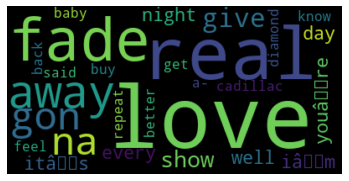

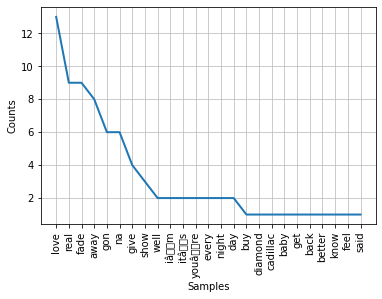

Second Nature   1987


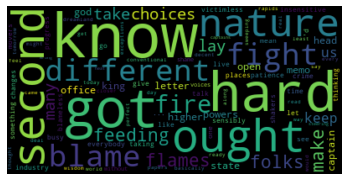

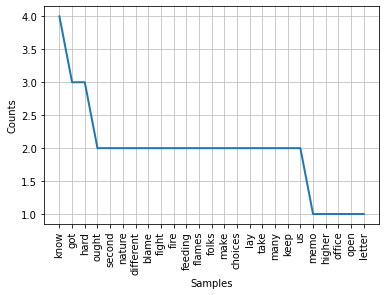

Finding My Way   1974


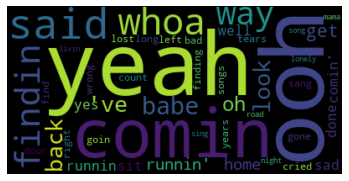

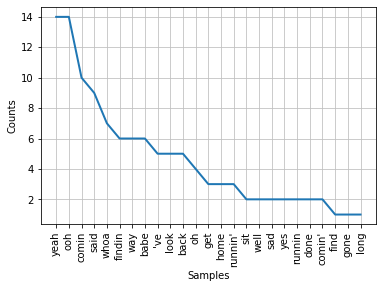

In [54]:
# Get Specific tracks
tracknames = ['Not Fade Away','Second Nature', 'Finding My Way']

for track in tracknames:
    row = tracksdf[tracksdf['Title'] == track]
    # Get song title and lyrics
    song = row.Title.squeeze()
    year = row.Year.squeeze()
    textdata = row.Lyrics.squeeze()
    textdata = textdata.lower()
    
    # Now draw the cloud
    print(song, ' ', year)
    draw_cloud(make_cloud(count_words(remove_stop(tokenize(textdata)))))

    # Now plot the frequencies of the words
    words = remove_stop(tokenize(textdata))
    data_analysis = nltk.FreqDist(words)
    data_analysis.plot(25, cumulative=False)


# It might be more useful to aggregate the data for a single album (year) 

# Try this for all the songs on their earliest album in 1974 : 
___

1974


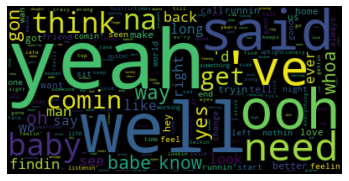

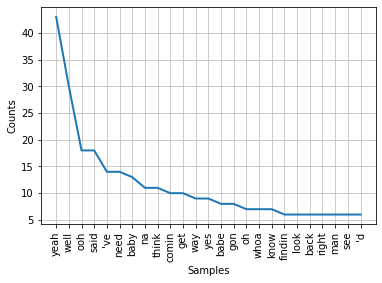

In [55]:
# Get all 1974 tracks

tracks1974 = tracksdf.loc[tracksdf['Year']=='1974']

all1974 = ''

# Iterate over this range
for index, row in tracks1974.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all1974 = all1974 + textdata

# Now draw the cloud
print('1974')
#print(all1974)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all1974)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all1974))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)


# Let's do this for their very last album 2012 : 
___

2012


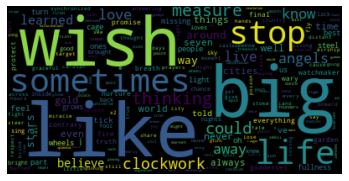

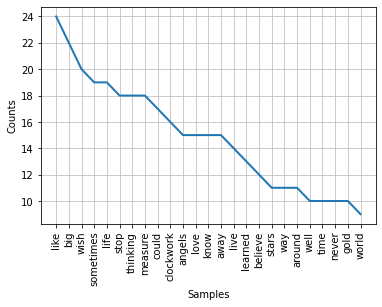

In [56]:
# Get all 2012 tracks

tracks2012 = tracksdf.loc[tracksdf['Year']=='2012']

all2012 = ''

# Iterate over this range
for index, row in tracks2012.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all2012 = all2012 + textdata
    

# Now draw the cloud
print('2012')
#print(all2012)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all2012)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all2012))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)


# We can now enhance this raw data by calculating additional information that may be useful for during further analysis :

1. Sentiment values for each song 
2. Lyric word count and unique word count 
3. Year as a numeric for easier plotting
4. Decade for a 10 year analysis 
___

In [57]:
#First copy the dataframe so original data is not corrupted

copydf = {}
copydf = tracksdf


# Add sentiment calculations for each song : 
___

In [58]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in copydf.index:
    scores = sid.polarity_scores(copydf['Lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score
copydf['negative'] = negative
copydf['neutral'] = neutral
copydf['positive'] = positive
copydf['compound'] = compound

#copydf.head()

# For each track calculate the number of words, unique words : 
___

In [59]:
#Create additional columns for number of words, number of unique words for later analysis
copydf['NumWords'] = 0
copydf['NumUniqueWords'] = 0

# Iterate over every row
for index, row in copydf.iterrows():
    # Get the lyrics in each row and process to create a list of words
    textdata = row['Lyrics']
    textdata = textdata.lower()
    words = remove_stop(tokenize(textdata))
    # No of words are simply the size of the list
    number = len(words)
    # Find the number of unique words by counting the words in a dictionary
    dict = count_words(words)
    uniquenumber = len(dict)
    row['NumWords'] = number
    row['NumUniqueWords'] = uniquenumber
    copydf.iloc[index] = row

#copydf.head()

# Lets add a numeric value for the year to ease plotting : 
___

In [60]:
# Convert the Year to a new column in the table 

copydf['YearNum'] = 1066

# Iterate over every row
for index, row in copydf.iterrows():
    yearStr = row.Year
    if (yearStr.isdigit()) :
        row['YearNum'] = int(yearStr)
    else :
        row['YearNum'] = 2021
    copydf.iloc[index] = row 

#pd.to_numeric(copydf['Year'])
#copydf.head()

# Lets add a Decade column for 10 year analysis : 
___

In [61]:
# Create a new Decade column 

copydf['Decade'] = '60s'

#copydf.head()

In [62]:
# Now loop through each row and set the Decade column 

# Iterate over every row
for index, row in copydf.iterrows():
    yearStr = row.Year
    if (yearStr.isdigit()) :
        row['Decade'] = yearStr[2] + '0s'
    else :
        row['Decade'] = '10s'
    copydf.iloc[index] = row
    
#copydf.head()

# Let's do a sentiment plot of each track by year : 
___

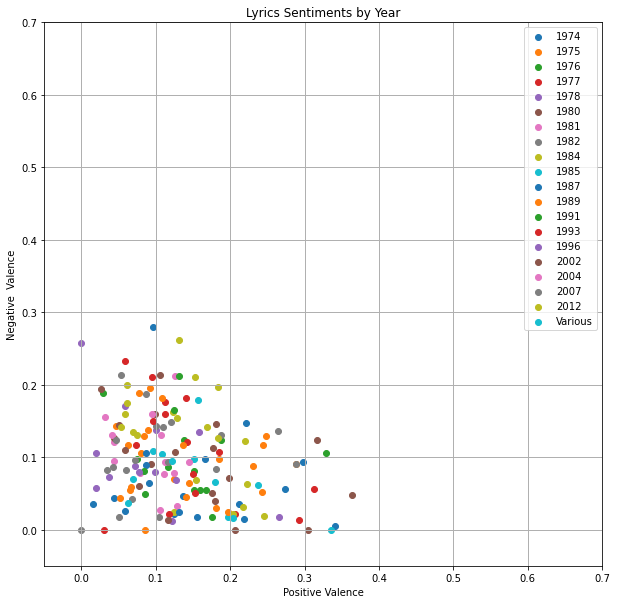

In [63]:
plt.figure(figsize=(10, 10))
for name, group in copydf.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.grid(linewidth=1)

plt.show()

# Do a sentiment plot in a different way : 
___

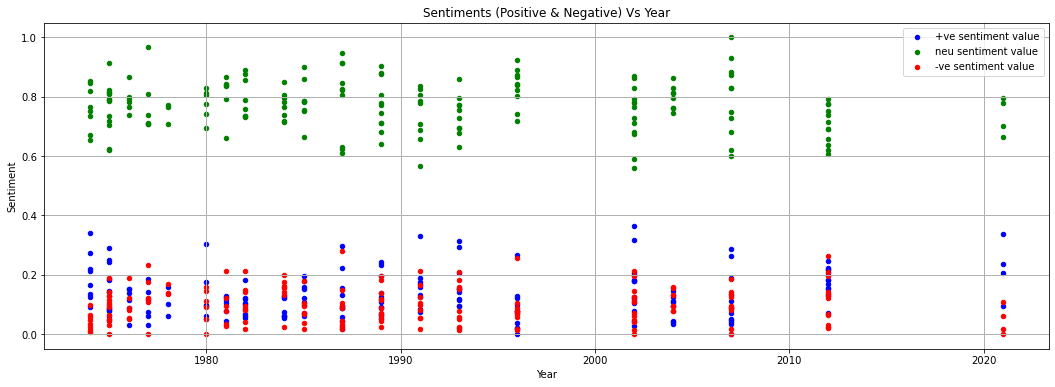

In [64]:
plt.figure(figsize=(18, 6))
plt.title('Sentiments (Positive & Negative) Vs Year')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.grid(linewidth=1)
plt.scatter(copydf.YearNum, copydf.positive, s=20, c='b', label='+ve sentiment value')
plt.scatter(copydf.YearNum, copydf.neutral, s=20, c='g', label='neu sentiment value')
plt.scatter(copydf.YearNum, copydf.negative, s=20, c='r', label='-ve sentiment value') 
plt.legend()

# Plot the number of words and unique words by year 

# This will cover each song for all the songs in an album : 
___

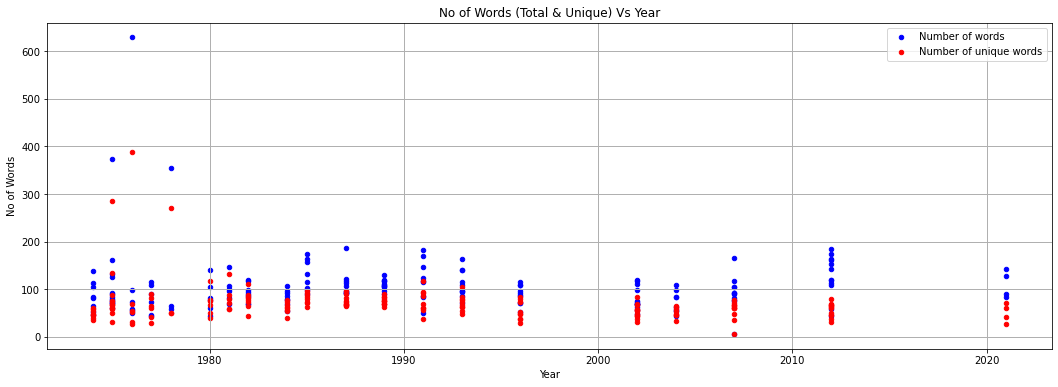

In [65]:
#copydf

plt.figure(figsize=(18, 6))
plt.title('No of Words (Total & Unique) Vs Year')
plt.xlabel('Year')
plt.ylabel('No of Words')
plt.grid(linewidth=1)
plt.scatter(copydf.YearNum, copydf.NumWords, s=20, c='b', label='Number of words')
plt.scatter(copydf.YearNum, copydf.NumUniqueWords, s=20, c='r', label='Number of unique words') 
plt.legend()

# Plotting indiviual songs is useful but grouping the data for a particular album may proved more insightful as it gives us an indication how the band were feeling during the period of time the album was written 

# Let's create another DF that groups the data for an album and gives us averages : 
___

In [66]:
# Create a DF that groups the data by Year and finds the mean for the album from the songs on that album  

groupdf = copydf.groupby('Year').mean()

groupdf.head()

,negative,neutral,positive,compound,NumWords,NumUniqueWords,YearNum
Year,,,,,,,
1974,0.042500,0.762250,0.195375,0.860137,85.375000,48.500000,1974.0
1975,0.091385,0.765154,0.143615,0.233646,115.076923,86.461538,1975.0
1976,0.097000,0.791000,0.112000,0.504317,160.833333,103.666667,1976.0
1977,0.125667,0.773500,0.100500,-0.068883,79.000000,61.500000,1977.0
1978,0.147000,0.748000,0.105667,-0.138233,158.666667,124.333333,1978.0


# Repeat sentiment analysis for whole album : 
___

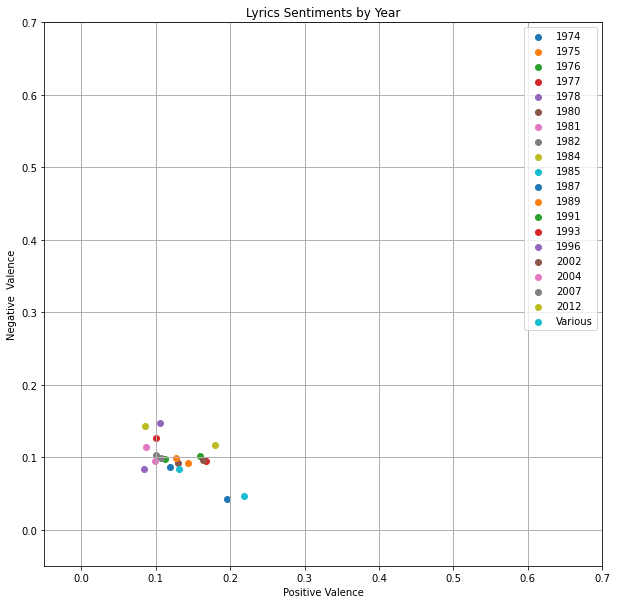

In [67]:
# Sentiment analysis on aggregate year 

plt.figure(figsize=(10, 10))
for name, group in groupdf.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.grid(linewidth=1)

plt.show()

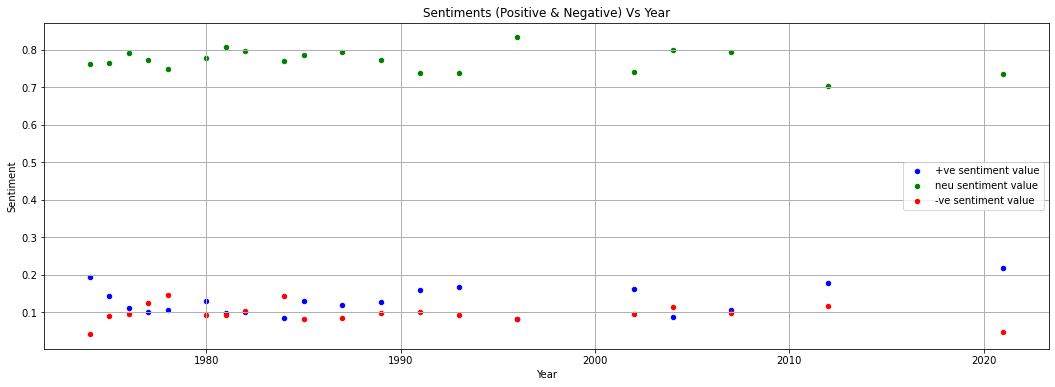

In [68]:
# Sentiment analysis on aggregate year 

plt.figure(figsize=(18, 6))
plt.title('Sentiments (Positive & Negative) Vs Year')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.grid(linewidth=1)
plt.scatter(groupdf.YearNum, groupdf.positive, s=20, c='b', label='+ve sentiment value')
plt.scatter(groupdf.YearNum, groupdf.neutral, s=20, c='g', label='neu sentiment value')
plt.scatter(groupdf.YearNum, groupdf.negative, s=20, c='r', label='-ve sentiment value') 
plt.legend()

# Plot the number of words and unique words for album : 
___

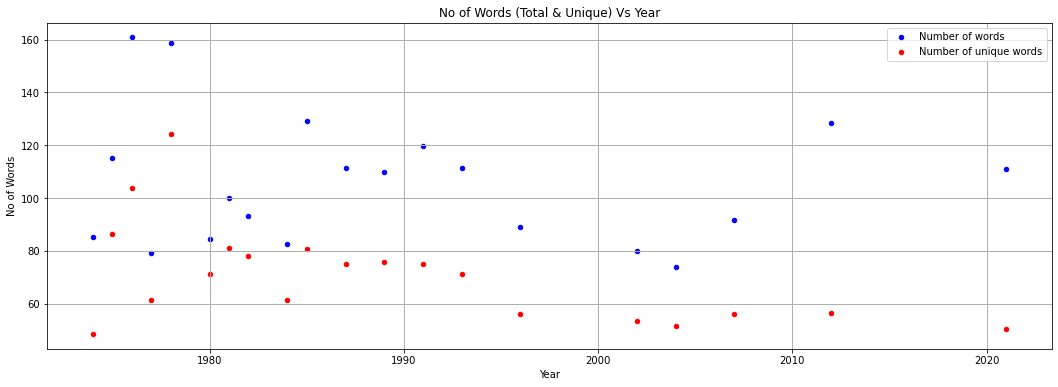

In [69]:
plt.figure(figsize=(18, 6))
plt.title('No of Words (Total & Unique) Vs Year')
plt.xlabel('Year')
plt.ylabel('No of Words')
plt.grid(linewidth=1)
plt.scatter(groupdf.YearNum, groupdf.NumWords, s=20, c='b', label='Number of words')
plt.scatter(groupdf.YearNum, groupdf.NumUniqueWords, s=20, c='r', label='Number of unique words') 
plt.legend()

# Draw wordclouds using cumulative decade data : 
___

1970s


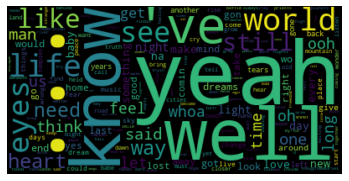

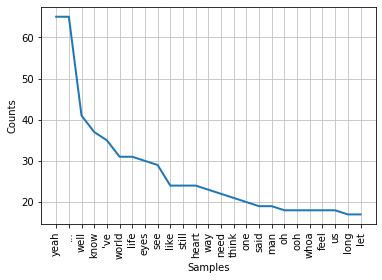

1980s


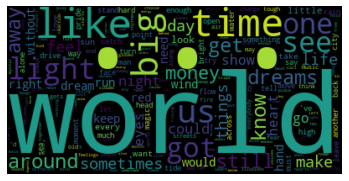

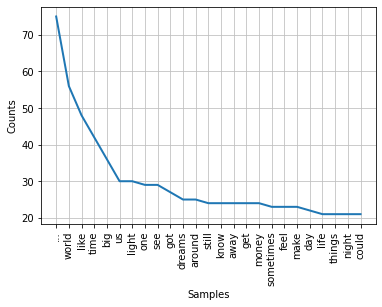

1990s


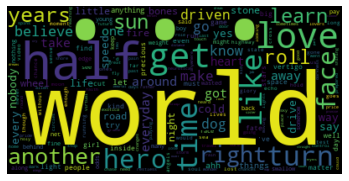

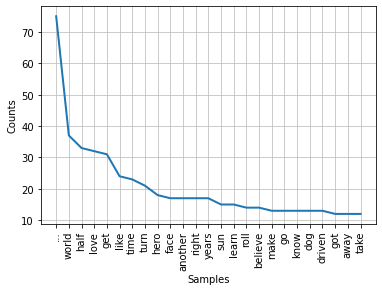

2000s


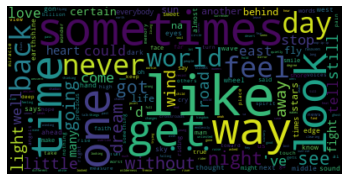

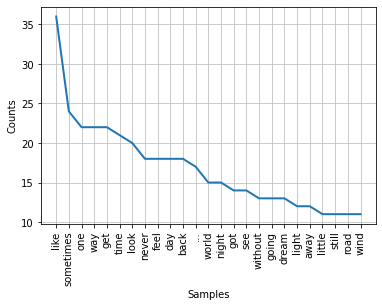

2010s


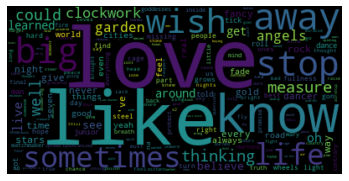

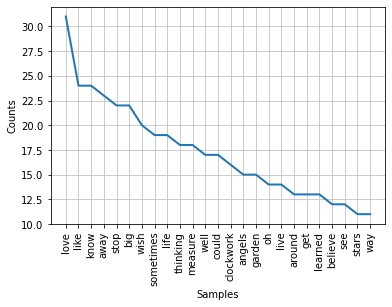

In [77]:
# Get all 70s tracks

tracks70s = copydf.loc[tracksdf['Decade']=='70s']

all70s = ''

# Iterate over this range
for index, row in tracks70s.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all70s = all70s + textdata

# Now draw the cloud
print('1970s')
#print(all70s)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all70s)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all70s))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Get all 80s tracks

tracks80s = copydf.loc[tracksdf['Decade']=='80s']

all80s = ''

# Iterate over this range
for index, row in tracks80s.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all80s = all80s + textdata

# Now draw the cloud
print('1980s')
#print(all80s)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all80s)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all80s))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Get all 90s tracks

tracks90s = copydf.loc[tracksdf['Decade']=='90s']

all90s = ''

# Iterate over this range
for index, row in tracks90s.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all90s = all90s + textdata

# Now draw the cloud
print('1990s')
#print(all90s)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all90s)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all90s))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Get all 2000s tracks

tracks00s = copydf.loc[tracksdf['Decade']=='00s']

all00s = ''

# Iterate over this range
for index, row in tracks00s.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all00s = all00s + textdata

# Now draw the cloud
print('2000s')
#print(all00s)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all00s)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all00s))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Get all 2010s tracks

tracks10s = copydf.loc[tracksdf['Decade']=='10s']

all10s = ''

# Iterate over this range
for index, row in tracks10s.iterrows():
    # Get song title and lyrics
    #song = row['Title']
    textdata = row['Lyrics']
    textdata = textdata.lower()
    all10s = all10s + textdata

# Now draw the cloud
print('2010s')
#print(all10s)
draw_cloud(make_cloud(count_words(remove_stop(tokenize(all10s)))))

# Now plot the frequencies of the words
words = remove_stop(tokenize(all10s))
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Conclusions :

1. It was very surprising to see the sentiment plots confirmed that the range of sentiments for all albums over a period from 1974 until 2012 (almost 40 years) only occupied a small sector of the plot. This in not surprising as a liflong fan of RUSH you know what you will get i.e. nothing too negative or too positive or too driven by the trends of the day. It indicates the main lyricist Neil Peart was a pretty stable guy over that period of his life. 
___
2. The number of words plot showed short songs in the early years of RUSH's career, which rapidly rise after a few albums but then fall gradually during the 80's and continue to fall during the 90's. During the 2000's they gradually rise again until their last album contains longer songs not seen since the 80's. It is also interesting to see the number of unique words gradually increase during the first 2 decades but remain low post the 2000's. This indicates that, in the first couple of decades, songs become longer and more complex i.e. concept albums explaining more complicated ideas rather than pop songs with repetition of lyrics. This is evident during the 90's when the songs become shorter and less complex i.e. maybe more commercially orientated. This does in fact correlate to the periods mentioned in the Wikipedia article (see references below) :

    - 1974–1976: Neil Peart joins, foray into progressive rock 
    - 1977–1981: Peak progressive era
    - 1982–1989: Synthesizer-oriented era
    - 1989–2002: Return to guitar-oriented sound, hiatus 
    - 2002–2009: Comeback, Vapor Trails, and Snakes & Arrows 
    - 2009–2013: Time Machine Tour and Clockwork Angels 
___
3. Looking at the wordcloud and word frequency plots for each decade, simple observations show : 

    1. 1970s: simple personal words predominate; 'yeah', 'well, 'know', 'I've ...
    2. 1980s: more complex words outside the self come into play; 'world', 'like', 'time', 'big' ...
    3. 1990s: more outward looking trend continues; 'world', 'half', 'world', 'get', 'like' ...
    4. 2000s: more concerned with feelings; 'like', 'sometimes', 'one', 'way', 'get' ...
    5: 2010s: increasing emphasis on feelings and emotions; 'love','like', 'know', 'away', 'stop' ...
___

# Further work :

1. The song's of RUSH provide a rich vein of data that would benefit from more in depth work.

2. Given time, I would like to perform more detailed analysis of the lyrics e.g. how the use of the most frequent words vary from album to album. Can this be correlated with events happening in the World at that time ? For example after 911 (2001)  I do recall their albums becoming more political making reference to the conflict between the 'Middle East' and the 'Middle West'. 
___

# References : 

1. Ideas and inspiration from techniques developed at [towards data science by Cristobal Veas](https://towardsdatascience.com/how-to-analyze-emotions-and-words-of-the-lyrics-from-your-favorite-music-artist-bbca10411283) 

2. RUSH Album and Song information obtained from [azlyrics.com](https://www.azlyrics.com/r/rush.html) 

3. Wikipedia article about RUSH (https://en.wikipedia.org/wiki/Rush_(band) 
___